<a href="https://www.kaggle.com/code/drag221b/breast-cancer-classification-logistic-regression?scriptVersionId=161684514" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**About Dataset**

This dataset contains features of breast mass. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. This information is used to predict whether the cancer is benign or malignant.

Following is an overview of the attributes used:
1. **ID number**
2. **Diagnosis** (M = malignant, B = benign)

3. Ten real-valued features are computed for each cell nucleus:

* **radius:** (mean of distances from center to points on the perimeter)
* **texture:** (standard deviation of gray-scale values)
* **perimeter**
* **area**
* **smoothness:** (local variation in radius lengths)
* **compactness:** (perimeter^2 / area - 1.0)
* **concavity:** (severity of concave portions of the contour)
* **concave points:** (number of concave portions of the contour)
* **symmetry**
* **fractal dimension:** ("coastline approximation" - 1)

4. The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

5. All feature values are recoded with four significant digits.
6. Missing attribute values: none
7. Class distribution: 357 benign, 212 malignant








  

In [1]:
!pip install opendatasets

**Importing Data From Kaggle**

Here I am using opendatasets for importing the data. Once installed [You can use !pip install opendatasets] in your environment you have to use your kaggle username and Api key to download the dataset.

In [17]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data')

Skipping, found downloaded files in "./breast-cancer-wisconsin-data" (use force=True to force download)


**Importing Python Libraries:**

In [14]:
# Linear Algebra and data processing
import pandas as pd
import numpy as np
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# ignore all warnings
import warnings
warnings.filterwarnings('ignore')

**Reading and Data Analysis:**

In [18]:
data_df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


This dataset contains 569rows and 33 columns.
Intial Look at data:
1. Here **ID** column is of no use
2. **Unnamed: 32** contains only NaN values so we will discard that.
3. **Diagnosis** is our target column we have to use this results to train a machine learning model that can then predict results of new inputs.

In [23]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

As we can see there is no missing values in remaining columns which is good for us as we do not need to impute. 

In [24]:
data_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**Visulaization**

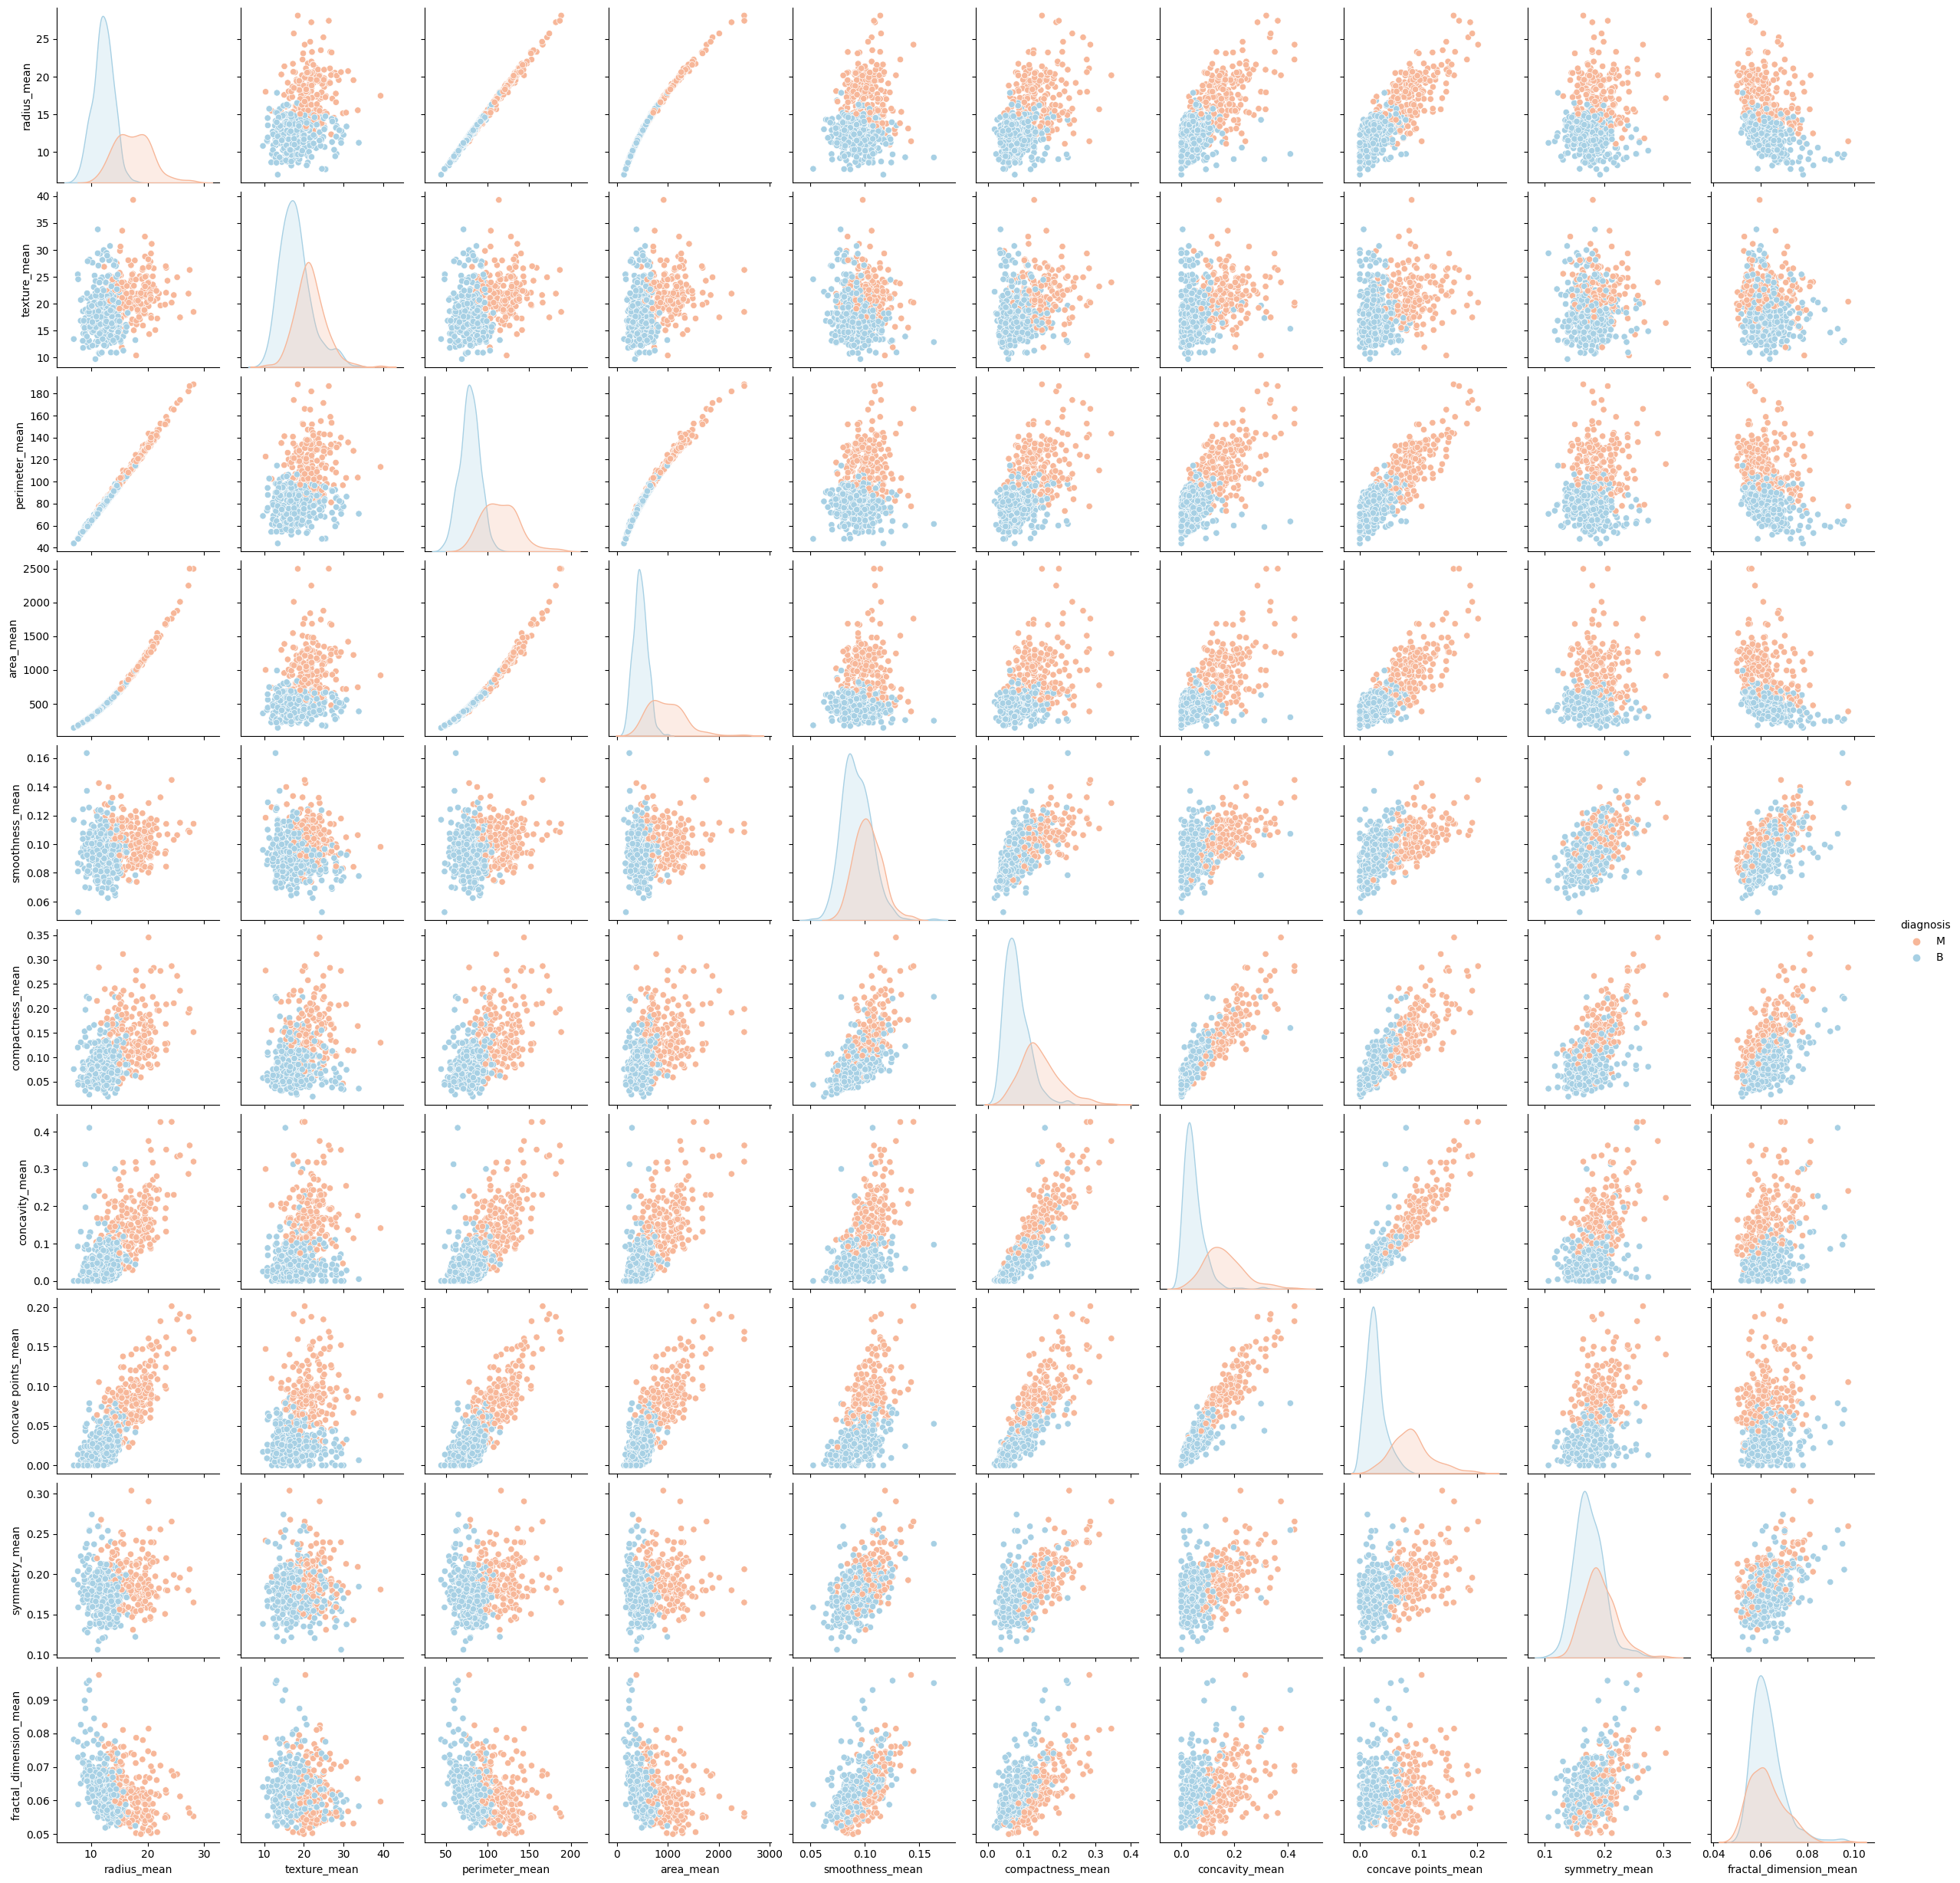

In [27]:
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=data_df[cols], hue='diagnosis', palette='RdBu')

<Axes: xlabel='diagnosis', ylabel='Count'>

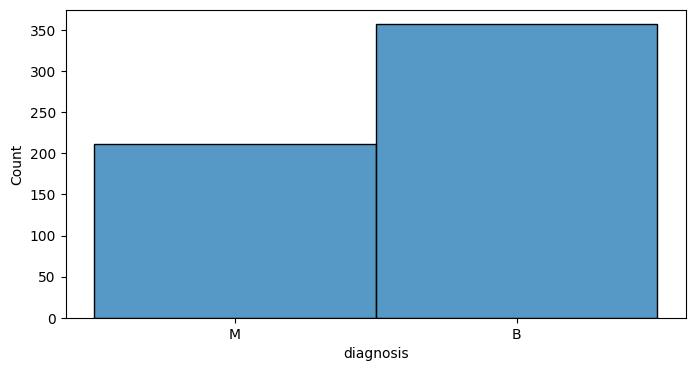

In [35]:
plt.figure(figsize=(8, 4))
sns.histplot(data_df['diagnosis'])

In [36]:
px.scatter(data_df,x='radius_mean',y='smoothness_mean',color='diagnosis')

**Dividing dataset into input and target**

In [37]:
data_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Now we will set input columns that the machine learning model will train upon and try to predict the target column (Diagnosis) value ((M = malignant, B = benign))

Input Columns: ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst',]
       
Target Column: 'diagnosis'

In [38]:
input_cols = list(data_df.columns)[2:-1]
target_col = 'diagnosis'

**Spltting Dataset into training, validation and test sets**

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import OneHotEncoder

In [40]:
train_val_df,test_df = train_test_split(data_df,test_size=0.2,random_state=16)
train_df,val_df = train_test_split(train_val_df,test_size=0.25,random_state=16)

In [41]:
train_inputs,train_targets = train_df[input_cols].copy(),train_df[target_col].copy()
val_inputs,val_targets = val_df[input_cols].copy(),val_df[target_col].copy()
test_inputs,test_targets = test_df[input_cols].copy(),test_df[target_col].copy()

**Scaling all the values for better fitting**

In [42]:
scaler = MinMaxScaler().fit(data_df[input_cols])
train_inputs[input_cols] = scaler.transform(train_inputs[input_cols])
val_inputs[input_cols] = scaler.transform(val_inputs[input_cols])
test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

In [43]:
train_inputs

,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,0.514034,0.882524,0.735737,0.484517,0.757990,0.782334,0.916998,0.388384,0.376158,0.284555,...,0.785130,0.575693,0.803277,0.584153,0.568778,0.563020,0.517252,0.985223,0.155726,0.328348
469,0.286439,0.225209,0.112534,0.585628,0.395436,0.238988,0.276541,0.453030,0.475779,0.108130,...,0.193170,0.356610,0.187908,0.084275,0.705474,0.252748,0.254473,0.486598,0.215849,0.247016
453,0.144403,0.346002,0.212386,0.517017,0.224035,0.161551,0.322813,0.297980,0.236942,0.070433,...,0.279972,0.130864,0.262413,0.138788,0.419534,0.116919,0.109665,0.367354,0.205204,0.151253
397,0.262090,0.271301,0.154740,0.251061,0.213392,0.173149,0.202932,0.259596,0.158804,0.091400,...,0.206688,0.240938,0.200757,0.099735,0.159612,0.149324,0.151837,0.285086,0.083383,0.101600
315,0.241461,0.244627,0.143415,0.293220,0.058156,0.010480,0.031923,0.078283,0.142586,0.021764,...,0.192458,0.204957,0.169680,0.088232,0.259064,0.021577,0.015479,0.095670,0.069387,0.043946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,0.141698,0.111741,0.048484,0.762571,0.316300,0.078069,0.120328,0.574242,0.568660,0.087742,...,0.093917,0.155117,0.086807,0.034752,0.751700,0.176975,0.079840,0.249553,0.417110,0.228125
282,0.286439,0.576394,0.424814,0.461045,0.382860,0.380975,0.470378,0.420707,0.188711,0.130147,...,0.564212,0.443230,0.507944,0.354601,0.532457,0.337253,0.344728,0.773883,0.399172,0.149744
264,0.417991,0.468592,0.332895,0.402907,0.216459,0.212301,0.324404,0.407576,0.122999,0.111823,...,0.485592,0.461354,0.448678,0.307413,0.558872,0.222575,0.310623,0.681787,0.325448,0.135511
554,0.649645,0.267501,0.157285,0.258193,0.119195,0.145150,0.116451,0.255556,0.149958,0.036248,...,0.212024,0.632196,0.191394,0.100890,0.340289,0.130696,0.194808,0.223127,0.159077,0.113997


As we can see from above datframe that now all values has been scaled in range of 0-1. This is very important in order to best fit the data.

**Saving the inputs and target for training, validation and test sets**

In [44]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

Now we have all splitted datasets saved locally. 

In [45]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')
train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

**Machine Learning Models**

We will be using Logistic Regression for this dataset.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

In [47]:
model = LogisticRegression(solver ='liblinear').fit(train_inputs,train_targets)

In [48]:
pred = model.predict(train_inputs)
accuracy_score(pred,train_targets)

0.9706744868035191

In [49]:
pred = model.predict(val_inputs)
accuracy_score(pred,val_targets)

0.9649122807017544

In [50]:
pred = model.predict(test_inputs)
accuracy_score(pred,test_targets)

0.9824561403508771

We can also save our model, scaler, input columns and target column locally for our convenience.

In [51]:
breast_cancer = {
    'model':model,
    'scaler':scaler,
    'input_cols':input_cols,
    'target_col':target_col

}
joblib.dump(breast_cancer,'breast_cancer.joblib')

['breast_cancer.joblib']

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(test_targets,pred)

array([[73,  0],
       [ 2, 39]])

In [54]:
def predict_and_plot(inputs,targets,name=''):
  preds = model.predict(inputs)
  accuracy = accuracy_score(targets,preds)
  print("Accuracy: {:.2f}%".format(accuracy*100))
  cf = confusion_matrix(targets,preds,normalize ='true')
  plt.figure()
  sns.heatmap(cf,annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title("{} Confusion Matrix".format(name))
  return preds

Accuracy: 96.49%


array(['M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)

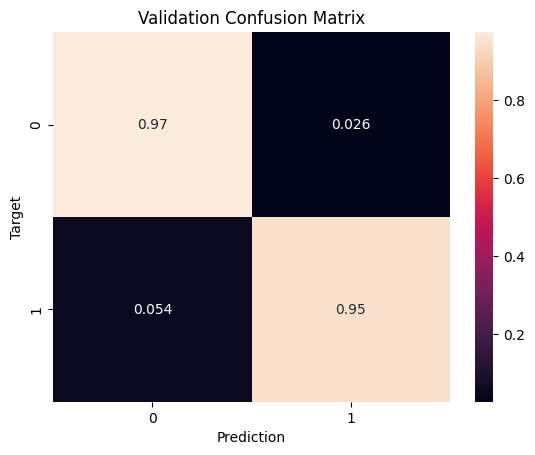

In [55]:
predict_and_plot(val_inputs,val_targets,'Validation')

In [56]:
def predict_input(single_input):
  input_df = pd.DataFrame([single_input])
  input_df[input_cols] = scaler.transform(input_df[input_cols])
  input = input_df[input_cols]
  pred = model.predict(input)
  prob = model.predict_proba(input)[0][list(model.classes_).index(pred)]
  return pred, prob

Predicting Diagnosis (M = malignant, B = benign)) for a new input containing all the required input coulmns used for fitting.

In [57]:
new_input = {'id': 842302,
 'radius_mean': 17.99,
 'texture_mean': 10.38,
 'perimeter_mean': 122.8,
 'area_mean': 1001.0,
 'smoothness_mean': 0.1184,
 'compactness_mean': 0.2776,
 'concavity_mean': 0.3001,
 'concave points_mean': 0.1471,
 'symmetry_mean': 0.2419,
 'fractal_dimension_mean': 0.07871,
 'radius_se': 1.095,
 'texture_se': 0.9053,
 'perimeter_se': 8.589,
 'area_se': 153.4,
 'smoothness_se': 0.006399,
 'compactness_se': 0.04904,
 'concavity_se': 0.05373,
 'concave points_se': 0.01587,
 'symmetry_se': 0.03003,
 'fractal_dimension_se': 0.006193,
 'radius_worst': 25.38,
 'texture_worst': 17.33,
 'perimeter_worst': 184.6,
 'area_worst': 2019.0,
 'smoothness_worst': 0.1622,
 'compactness_worst': 0.6656,
 'concavity_worst': 0.7119,
 'concave points_worst': 0.2654,
 'symmetry_worst': 0.4601,
 'fractal_dimension_worst': 0.1189,
 'Unnamed: 32': 'nan'}
predict_input(new_input)

(array(['M'], dtype=object), 0.9933609974680642)

**Conclusion**

We have succefuly build a machine learning model using Logistic Regression that is able to predict the Diagnosis result with an accuracy of 97.36%.